<a href="https://colab.research.google.com/github/EmmanuelHernandezV/Ejercicios-Notebooks/blob/main/08.%20Neural%20Networks%20Introduction%20-%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 8 - Introduction to Neural Networks
=======

Originally hypothesised in the 1940s, neural networks are now one of the main tools used in modern AI. Neural networks can be used for both regression and categorisation applications. Recent advances with storage, processing power, and open-source tools have allowed many successful applications of neural networks in medical diagnosis, filtering explicit content, speech recognition and machine translation.

In this exercise we will compare three dog breeds, using their age, weight, and height. We will make a neural network model to classify the breeds of the dogs based on these features.

Note: It's extremely common for AI practitioners to use a template such as the one below for making neural networks quickly. After you are done, feel free to play around with the template to get a feel of how you can easily adjust a neural network to your problems using Keras.

__Run the code__ in the cell below.

In [1]:
# Run this!
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import keras
print('keras using %s backend'%keras.backend.backend())
import pandas as pd
import numpy as np
import matplotlib.pyplot as graph
%matplotlib inline
graph.rcParams['figure.figsize'] = (15,5)
graph.rcParams["font.family"] = 'DejaVu Sans'
graph.rcParams["font.size"] = '12'
graph.rcParams['image.cmap'] = 'rainbow'

keras using tensorflow backend


Step 1
------

Let's start by opening up our data and having a look at it.

#### In the cell below replace the `<printDataHere>` with `print(dataset.head())` and then __Run the code__ in the cell below.

In [3]:
# This loads the dataset
dataset = pd.read_csv('/content/dog_data.csv')

###
# REPLACE <printDataHere> with print(dataset.head()) TO PREVIEW OUR DATASET
###
print(dataset.head())
###

# This tells us the shape of the data set
print("Shape of data set:", dataset.shape)

# Defines the feature dataframe
features = dataset.drop(['breed'], axis = 1)

    age  weight  height  breed
0  9.47    6.20    6.80      1
1  7.97    8.63    8.92      0
2  9.51    6.40    5.78      1
3  8.96    8.82    6.28      2
4  8.37    3.89    5.62      1
Shape of data set: (200, 4)


So we've got data from __200 dogs__. The features are their __age__, __weight__, and __height__.

Step 2
------

Our labels are three breeds of dogs, represented as numbers in our dataset, as `0`, `1`, and `2`. 

For a neural network these numbers are misleading, as they might imply that breed `1` is closer to breed `2` than breed `0` is, in some way. But that is not the case here.

To allow the neural network to predict categories properly we represent categories as one-hot vectors. The labels (dog breeds) will go from being represented as `0`, `1`, and `2` to this:

| breed 0 | breed 1 | breed 2 |
|:------- |:------- |:------- |
| `1 0 0` | `0 1 0` | `0 0 1` |

So the if the 1 is in the first position, the neural network knows that it's breed 0.

If the 1 is in the second position, the neural network knows that it's breed 1, and so on.

#### Replace `<addLabels>` with `labels` and __Run the code__.

In [4]:
from sklearn.preprocessing import OneHotEncoder

# This sets the  labels (numerical)
labels = np.array(dataset['breed'])

###
# REPLACE THE <addLabels> BELOW WITH labels
###
onehot = OneHotEncoder(sparse = False).fit_transform(np.transpose([labels]))
###

print(onehot[:5])

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


There we go!

Step 3
-------

Before we make our model, let's get our test set and training set ready.

We've got data on 200 dogs, so we'll use 160 for a training set, and 40 for our test set.

#### Run the code below to set up our training at test sets.

In [7]:
# Run this! This sets up our training and test sets.

# This takes the first 160 examples for our training set
train_X = features.values[:160]
train_Y = onehot[:160]

# This takes the last 40 examples of the 200 for our test set
test_X = features.values[160:]
test_Y = onehot[160:]

## Step 4

That's our data ready. Now it's time to make your first neural network model!

This is the standard syntax for a model in Keras. You can always play around with adding in extra hidden layers and changing their size and activation functions later.

Our **first layer** is our **input layer**, with **3 nodes** because we have three features.

Our __second layer__ is our 1st hidden layer, so let's try **4 nodes** for it.

Our __third layer__ is our second hidden layer, let's try **2 nodes** for it.

Our **final layer** will be the **output layer**, in which we have **3 nodes**, one for each of the dog breeds.

### In the cell below replace:
#### 1. `<addSequential>` with `Sequential()`
#### 2. `<inputNodes>` with `3`
#### 3. `<hiddenNotes1>` with `4`
#### 4. `<hiddenNotes2>` with `2`
#### 5. `<outputNotes>` with `3`

#### and then __run the code__.

In [9]:
# Set a randomisation seed for replicatability.
np.random.seed(6)


# This creates our base model for us to add to
###
# REPLACE THE <addSequential> BELOW WITH Sequential()
###
model = keras.models.Sequential()
###

###
# REPLACE THE <inputNodes>, <hiddenNotes1>, <hiddenNotes2>, <outputNotes> BELOW WITH THE APPROPRIATE NUMBERS OF NODES AS DESCRIBED ABOVE
###
structure = [3, 4, 2, 3]
###

# Input layer + hidden layer 1
model.add(keras.layers.Dense(units=structure[1], input_dim = structure[0], activation = 'relu'))

# Hidden layer 2
model.add(keras.layers.Dense(units=structure[2], activation = 'relu'))

# Output layer - note that the activation function is softmax
# Softmax will predict a category and provide a value for how likely this is the correct prediction.
model.add(keras.layers.Dense(units=structure[3], activation = tf.nn.softmax))

print("Layer structure:", structure)

Layer structure: [3, 4, 2, 3]


Expected output:  
`Layer structure: [3, 4, 2, 3]`

Alright, that's your first model ready.

('tanh' is another common activation function if you want to try it instead of relu, but it doesn't perform very well here)

Step 5
-------

Next up we'll compile it and see how it runs.

There's a few parameters you can chose that change how the model trains, and end up changing how the model performs.

We will use some standard parameters for now. Feel free to experiment with some different parameters later on.

If this doesn't work, check your input the correct size for the input and output layers in step 4 (3 nodes each).

### In the cell below replace:
#### 1. `<addLoss>` with `'categorical_crossentropy'`
#### 2. `<addOptimizer>` with `sgd'`
#### 3. `<addMetric>` with `'accuracy'`
#### 4. `<addTrainX>` with `train_X`
#### 5. `<addTrainY>` with `train_Y`

#### and then __run the code__.

In [24]:
# Let's compile the model

###
# REPLACE THE <addLoss> WITH 'categorical_crossentropy', <addOptimizer> WITH 'sgd', AND <addMetric> with 'accuracy' (INCLUDING THE QUOTES)
###
model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
###

# Time to fit the model
print('Starting training')

###
# REPLACE THE <addTrainX> WITH train_X AND <addTrainY> WITH train_Y
###
training_stats = model.fit(train_X, train_Y, batch_size = 1, epochs = 24, verbose = 0)
###

print('Training finished')
print('Training Evaluation: loss = %0.3f, accuracy = %0.2f%%'
      %(training_stats.history['loss'][-1], 100 * training_stats.history['accuracy'][-1]))

Starting training
Training finished
Training Evaluation: loss = 1.101, accuracy = 33.13%


See? Neural networks aren't too hard.

`'adam'` is another popular optimizer if you want to try it instead of `'sgd'`

#### Lets plot it! Run the cell below.

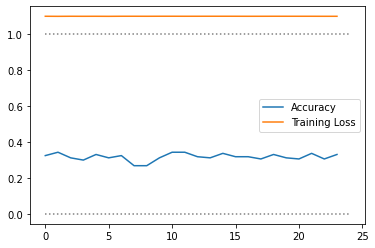

In [27]:
# Run this!

accuracy, = graph.plot(training_stats.history['accuracy'],label = 'Accuracy')
training_loss, = graph.plot(training_stats.history['loss'],label = 'Training Loss')


graph.legend(handles = [accuracy,training_loss])
loss = np.array(training_stats.history['loss'])
xp = np.linspace(0, loss.shape[0], 10 * loss.shape[0])
graph.plot(xp, np.full(xp.shape, 1), c = 'k', linestyle = ':', alpha = 0.5)
graph.plot(xp, np.full(xp.shape, 0), c = 'k', linestyle = ':', alpha = 0.5)
graph.show()

Step 6
------

Now that our model is trained and ready, let's see how it performs on our test data!

It's important to test a model on data that it has never seen before, to make sure it doesn't overfit. Now let's evaluate it against the test set.

### In the cell below replace:
#### 1. `<addTestX>` with `test_X`
#### 2. `<addTestY>` with `test_Y`
#### and then __run the code__.

In [28]:
###
# REPLACE <addTestX> WITH test_X AND <addTestY> with test_Y
###
evaluation = model.evaluate(test_X, test_Y, verbose=0)
###

print('Test Set Evaluation: loss = %0.6f, accuracy = %0.2f' %(evaluation[0], 100*evaluation[1]))

Test Set Evaluation: loss = 1.105005, accuracy = 25.00


It seems to be very accurate with the random seed that we set, but let's see how it predicts something completely new and unclassified!

Come up with a brand new sample of the format `[age, weight, height]` to test it with.

#### Replace the `<addNumber>`'s below with any numbers you want.

In [31]:
###
# REPLACE THE <addNumber> BELOW WITH A WHATEVER NUMBERS YOU WANT, e.g. [9, 7, 7]
###
# [age, weight, height]
new_sample = [7, 7, 7]
###

Let's have a look at where our new sample sits in comparison to our dataset.

#### Replace the `<addNewSample>`'s below with `new_sample`

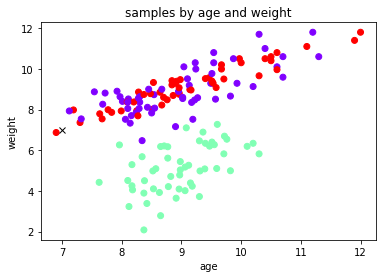

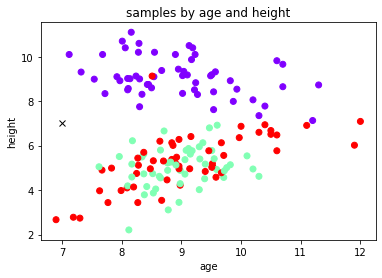

In [33]:
# Plots out the age-weight relationship

###
# REPLACE THE <addNewSample> BELOW WITH new_sample
###
graph.plot(new_sample[0], new_sample[1], 'ko', marker='x')
###

graph.scatter(train_X[:,0], train_X[:,1], c = labels[:160])
graph.title('samples by age and weight')
graph.xlabel('age')
graph.ylabel('weight')
graph.show()

# Plot out the age-height relationship

###
# REPLACE THE <addNewSample> BELOW WITH new_sample
###
graph.plot(new_sample[0], new_sample[2], 'ko', marker='x')
###

graph.scatter(train_X[:,0], train_X[:,2], c = labels[:160])
graph.title('samples by age and height')
graph.xlabel('age')
graph.ylabel('height')
graph.show()

Looks alright? Now let's see what breed of dog the model says it is!

#### Replace `<addNewSample>` with `new_sample`

In [34]:
###
# REPLACE THE <addNewSample> BELOW WITH new_sample
###
predicted = model.predict(np.array([new_sample]))
print('Breed prediction for %s:' %(new_sample))
###

print(np.around(predicted[0],2))
print('Breed %s, with %i%% certainty.' %(np.argmax(predicted), np.round(100 * predicted[:, np.argmax(predicted)][0])))

Breed prediction for [7, 7, 7]:
[0.35 0.32 0.34]
Breed 0, with 35% certainty.


Breed `0` should be purple, breed `1` should be green, and breed `2` should be red.

Conclusion
------

We've built a simple neural network to help us predict dog breeds! In the next exercise we'll look into neural networks with a bit more depth, and at the factors that influence how well it learns.

If you want to play around with this neural network and a new data set, just remember to set your input and output sizes correctly.